# Introduction to Qiskit


**Qiskit**<br/>
|<br/>
|- **Terra** -- Solid foundation for running quantum circuits on device and simulator backends<br/>
|- **Aer** -- Simulators + noise models<br/>
|- **Aqua** -- High-level quantum algorithms for various applications (chemistry, finance, optimization, AI)<br/>
|- **Ignis** -- Tools for understanding and mitigating noise (T1 and T2 measurements, randomized benchmarking, tomography)<br/>



# Installing Qiskit

https://qiskit.org/documentation/install.html

Make sure Python >= 3.5 is available. 
Highly recommend installing Python using Anaconda (includes `jupyter notebook` and other Python packages).
```
$ pip install qiskit

```

In [77]:
# Try some import from qiskit
from qiskit import QuantumCircuit
from qiskit import QuantumCircuit, Aer, execute

from qiskit.aqua.algorithms import Grover

from qiskit.ignis.verification.randomized_benchmarking import RBFitter
from qiskit.chemistry import *

# Checking qiskit version 

In [1]:
import qiskit

print("Terra version :" ,qiskit.__version__ )

print("\nQiskit components version :", qiskit.__qiskit_version__ )


In [2]:
# Another way to check qiskit version
import qiskit.tools.jupyter

%qiskit_version_table

# Setting up access to run devices

https://qiskit.org/documentation/install.html#install-access-ibm-q-devices-label

In [90]:
# save your token to your local laptop
from qiskit import IBMQ

API_TOKEN = '<Your Token>'

IBMQ.save_account(API_TOKEN)

# Loading saved access to run devices

In [9]:
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Using a provider

In [10]:
# listing the providers you have access to 
IBMQ.providers()


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <AccountProvider for IBMQ(hub='ibm-q-internal', group='support', project='support-team')>,
 <AccountProvider for IBMQ(hub='ibm-q-internal', group='support', project='test-provider')>,
 <AccountProvider for IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <AccountProvider for IBMQ(hub='ibm-q-example', group='patricktest', project='myproject')>,
 <AccountProvider for IBMQ(hub='ibm-q-example', group='grp-priv', project='proj-priv')>]

In [11]:
# let's use a provider 
# Here below we use the open group provider giving access to the "open" devices

provider = IBMQ.get_provider(hub='ibm-q-internal', group='support', project='core-team')

In [92]:
# Use your Fraunhofer provider to access "premium" devices

provider = IBMQ.get_provider(hub='ibm-q-fraunhofer', group='<your group>', project='<Your project>')


# Backends for your provider

In [12]:
# listing backends your provider have access to 
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_boeblingen') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q-internal', grou

In [13]:
# get an overview of the backends
from qiskit.tools.jupyter import *
%qiskit_backend_overview

# The least busy backend

In [16]:
# Checking for the least busy backend 
from qiskit.providers.ibmq import least_busy

available_backends=provider.backends(simulator=False, operational=True)

lb_backend = least_busy(available_backends)

print('The least busy backend is: ', lb_backend.name())

The least busy backend is:  ibmq_boeblingen


# Using the least busy backend

In [17]:
backend = least_busy(available_backends)
backend.name()

'ibmq_boeblingen'

In [21]:
# if you wanna use the least busy backend 
backend = provider.get_backend(backend.name())
print(backend)

ibmq_boeblingen


### If you want to get the least busy backend among premium device with more thatn 16 qubits  

In [26]:
# print only the real backends of your provider and those with a number of qubits greater than 1
# filter available backends without ibmq_armonk 

backends = list(filter(lambda device:device.configuration().num_qubits>20, available_backends))
print (backends)

[<IBMQBackend('ibmq_rochester') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>, <IBMQBackend('ibmq_cambridge') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>, <IBMQBackend('ibmq_paris') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>]


In [27]:
# using the least busy backend with more thatn 16 qubits  
lb_backend = least_busy(backends)    
print(lb_backend)

lb_backend

ibmq_cambridge


<IBMQBackend('ibmq_cambridge') from IBMQ(hub='ibm-q-internal', group='support', project='core-team')>

# Using a specific backend 

### your primary backend at Fraunhofer being "ibmq_singapore"

In [100]:
# Selecting ibmq_singapore
backend = provider.backends.ibmq_singapore
backend.name()

'ibmq_singapore'

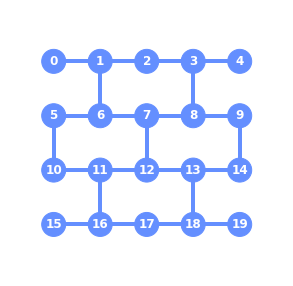

In [101]:
# ploting the coupling map of the backend
from qiskit.visualization import plot_gate_map
plot_gate_map(backend)